# Iowa podatki o prometnih nesrečah in prodaji alkohola

Naša skupina poskuša iz dveh podatkovnih množic o prometnih nesrečah v zvezni državi Iowi, in eni podatkovni množici o prodaji alkohola v zvezni državi Iowi, najti korelacijo zvišane prodaje alkohola in večji pogostosti prometnih nesreč.

### Opažanja

Ugotovili smo da je v podatkih veliko atributov, ki jih nebomo uporabljali (razni IDji, in neznane kategorije).

### Pregled podatkov

Spodaj smo odprli podatke da vidimo kakšne oblike so

In [4]:
# Relevantni importi
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from Orange.data.filter import SameValue
from Orange.data import Table
import numpy as np
from csv import DictReader

In [7]:
# Odprem podatke za branje
crash1_reader = DictReader(open('data/Crash_Data_1.csv', 'rt', encoding='utf-8'))
crash2_reader = DictReader(open('data/Crash_Data_2.csv', 'rt', encoding='utf-8'))
liquor_reader = DictReader(open('data/Liquor_Data.csv', 'rt', encoding='utf-8'))

# crash1_o = Table("data/Crash_Data_1.csv")
# crash2_o = Table("data/Crash_Data_2.csv")
# liquor_o = Table("data/Liquor_Data.csv")

In [8]:
# Pogledam imena polj v podatkih
# print(crash1_o.domain)
# print(crash2_o.domain)
# print(liquor_o.domain)
print(crash1_reader.fieldnames)
print("--------------")
print(crash2_reader.fieldnames)
print("--------------")
print(liquor_reader.fieldnames)

['\ufeffX', 'Y', 'OBJECTID', 'CRASH_KEY', 'CASENUMBER', 'LECASENUM', 'CRASH_DATE', 'CRASH_MONTH', 'CRASH_DAY', 'TIMESTR', 'DISTRICT', 'COUNTY_NUMBER', 'CITYNAME', 'SYSTEMSTR', 'LITERAL', 'FRSTHARM', 'LOCFSTHRM', 'CRCOMNNR', 'MAJCSE', 'DRUGALC', 'ECNTCRC', 'LIGHT', 'CSRFCND', 'WEATHER', 'RCNTCRC', 'RDTYP', 'PAVED', 'WZRELATED', 'CSEV', 'FATALITIES', 'INJURIES', 'MAJINJURY', 'MININJURY', 'POSSINJURY', 'UNKINJURY', 'PROPDMG', 'VEHICLES', 'TOCCUPANTS', 'REPORT', 'XCOORD', 'YCOORD']
--------------
['\ufeffX', 'Y', 'OBJECTID', 'VEH_CRASH_KEY', 'VEH_UNITKEY', 'CASENUMBER', 'DRIVERAGE', 'DRIVERGEN', 'DL_STATE', 'CHARGED', 'ALCRESULT', 'DRUGTEST', 'DRUGRESULT', 'DRIVERCOND', 'VISIONOBS', 'DCONTCIRC1', 'DCONTCIRC2', 'VCONFIG', 'CARGOBODY', 'VYEAR', 'MAKE', 'MODEL', 'STYLE', 'VLP_STATE', 'OCCUPANTS', 'VACTION', 'SEQEVENTS1', 'SEQEVENTS2', 'SEQEVENTS3', 'SEQEVENTS4', 'MOSTHARM', 'SPEEDLIMIT', 'TRAFCONT', 'FIXOBJSTR', 'MOSTDAMAGE', 'DAMAGE', 'CSEVERITY', 'MAJORCAUSE', 'CSURFCOND', 'DRUGALCREL', 'RO

In [9]:
# Pregledam kako vnosi podatkov zgledajo
for crash in crash1_reader:
    print(crash)
    break
print("------------------")
for crash in crash2_reader:
    print(crash)
    break
print("------------------")
for liquor in liquor_reader:
    print(liquor)
    break

OrderedDict([('\ufeffX', '-93.924554431950895'), ('Y', '42.048465967987823'), ('OBJECTID', '2003'), ('CRASH_KEY', '2016903367'), ('CASENUMBER', '2016903367'), ('LECASENUM', '201600311'), ('CRASH_DATE', '2016-01-22T00:00:00.000Z'), ('CRASH_MONTH', '1'), ('CRASH_DAY', '6'), ('TIMESTR', '07:56'), ('DISTRICT', '1'), ('COUNTY_NUMBER', '8'), ('CITYNAME', '0'), ('SYSTEMSTR', ''), ('LITERAL', 'Co Rd E41/216TH DR'), ('FRSTHARM', '20'), ('LOCFSTHRM', '1'), ('CRCOMNNR', '1'), ('MAJCSE', '42'), ('DRUGALC', '8'), ('ECNTCRC', '1'), ('LIGHT', '1'), ('CSRFCND', '3'), ('WEATHER', '2'), ('RCNTCRC', '2'), ('RDTYP', '1'), ('PAVED', '1'), ('WZRELATED', ''), ('CSEV', '4'), ('FATALITIES', '0'), ('INJURIES', '1'), ('MAJINJURY', '0'), ('MININJURY', '0'), ('POSSINJURY', '1'), ('UNKINJURY', '0'), ('PROPDMG', '4000'), ('VEHICLES', '1'), ('TOCCUPANTS', '1'), ('REPORT', '7'), ('XCOORD', '423489'), ('YCOORD', '4655570')])
------------------
OrderedDict([('\ufeffX', '-93.522746192863863'), ('Y', '43.365760584603784')

**Ker so nefiltrirani podatki različnih velikosti, in imajo različno število vnosov, jih sedaj moram filtrirati po neki kriterijski funkciji**
Crash_Data_1.csv je velik 73 Mb
Crash_Data_2.csv je velik 123 Mb
Liquor_Data.csv je velik 3,47 Gb

In [ ]:
# Prvo pregledamo število vnosov v posameznih datotekah,
# Vemo da imajo vsi podatke o datumu, tako da po intuiciji bi lahko
# filtrirali po tem.
crash1_row_count = sum(1 for crash in crash1_reader)
crash2_row_count = sum(1 for crash in crash2_reader)
liquor_row_count = sum(1 for liquor in liquor_reader)

print("Crash1 ima "+ str(crash1_row_count) +" vrstic.") # 73Mb z 350 066 vrstic
print("Crash2 ima "+ str(crash2_row_count) +" vrstic.") # 123Mb z 602 387 vrstic
print("Liquor ima "+ str(liquor_row_count) +" vrstic.") # 3,47 Gb z 12 591 076 vrstic
# Ker je čas branja pre velik, so vrstice zapisane v komentarjih zgoraj

** Recimo da bi bilo smiselno, in časovno učinkovito, imeti enako število vnosov za vse tri. **

** Ena rešitev tega problema, ki jo bom tudi uporabil, je da zmanjšam število vrstic Crash2 in Liquor podatkov na 350 066, kar je minimum od treh vrednosti, zato da niso datoteke pre velike. **

** Prvo se bom z uporabu naključnosti odločil če uporabim ta vnos (kovanec), in če ga, prištejem števec, ko bo števec 350 066 se pisanje fila konča **

In [3]:
import random
import csv

In [6]:
with open('Crash_Data_2_filt.csv', 'w',encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=crash2_reader.fieldnames)
    writer.writeheader()
    count = 1
    for crash in crash2_reader:
        coin = random.randint(1, 3)
        if coin > 1: 
            writer.writerow(crash) 
            count += 1
        if count == 350066: break
print(count)
print("Writing complete")

350066
Writing complete


In [7]:

with open('Liquor_Data_filt.csv', 'w',encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=liquor_reader.fieldnames)
    writer.writeheader()
    count = 1
    for liquor in liquor_reader:
        coin = random.randint(1, 33)
        if coin == 1: 
            writer.writerow(liquor) 
            count += 1
        if count == 350066: break
print(count)
print("Writing complete")

350066
Writing complete


** Delil sem 350066 z številom vrstic od zgoraj, da sem dobil približno katera verjetnost mora biti, da dokaj uravnoteženo filtriram podatke (2/3 je za crash2, 1/33 za liquor (približno))**

In [10]:
# Filtrirani podatki naloženi
crash1_filt_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
crash2_filt_reader = DictReader(open('data/Crash_Data_2_filt.csv', 'rt', encoding='utf-8'))
liquor_filt_reader = DictReader(open('data/Liquor_Data_filt.csv', 'rt', encoding='utf-8'))


**Odločil sem se narediti še eno selekcijo datotek, brez naključnosti**

In [11]:
with open('Crash_Data_2_filt_non_rand.csv', 'w',encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=crash2_reader.fieldnames)
    writer.writeheader()
    count = 1
    other_count = 0
    for crash in crash2_reader:
        if other_count == 0 or other_count == 1: 
            writer.writerow(crash)
            count += 1
        other_count +=1
        if other_count == 3:
            other_count = 0
        if count == 350066: break
print(count)
print("Writing complete")

350066
Writing complete


In [13]:
with open('Liquor_Data_filt_non_rand.csv', 'w',encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=liquor_reader.fieldnames)
    writer.writeheader()
    count = 1
    other_count = 0
    for liquor in liquor_reader:
        if other_count == 0: 
            writer.writerow(liquor)
            count += 1
        other_count +=1
        if other_count == 33:
            other_count = 0

        if count == 350066: break
print(count)
print("Writing complete")

350066
Writing complete


In [15]:
# Filtrirani podatki naloženi (crash data filt je isti, ker je tako ali tako cel)
crash1_filt_non_rand_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
crash2_filt_non_rand_reader = DictReader(open('data/Crash_Data_2_filt_non_rand.csv', 'rt', encoding='utf-8'))
liquor_filt_non_rand_reader = DictReader(open('data/Liquor_Data_filt_non_rand.csv', 'rt', encoding='utf-8'))

### Pomembnejši atributi

Iz podatkovnih množic bomo upoštevali naslednje atribute:

- Crash1: ID,Crash date, Crash day, time string, drug alcohol (stopnje), weather (stopnje 0-10, 10 najhuje), paved road (0 ali 1), fatalities, injuries, property damage, x in y koordinati.
<br />

- Crash2: ID,Driver age, x in y koordinati,drug result (0-100), alcohol result(0-100),drugtest (0 ali 1), alctest (0 ali 1), damage ($), crash severity (0-10), fatalities, crash year. ; problem ker ni datum, ampak samo leto.
<br />
- Liquor: Date, Invoice number (kot id),city,sale (dollars), volume sold (litres) ; Iz sale, in volume sold bomo poskušali predvidevati ali gre za žgane pijače ali ne.



### Zastavljena vprašanja

Glede na to, da je možno veliko število kombinacij atributov, smo si za začetek zastavili vprašanja (vezana samo na zvezno državo Iowa), ki so mogoče malo bolj osnovna, in sicer nas zanima:
- Če obstaja korelacija z visoko prodajo alkohola, in številom prometnih nesreč v določenih mesecih.
- Koliko od vseh prometnih nesreč na mesec je povezanih z alkoholom, in koliko od teh je resnejših (velika škoda).
- V katerem področju se zgodi največ nesreč, in kje se zgodi največ nesreč povezanih z alkoholom.
- V katerem delu dneva se zgodi večina prometnih nesreč, in v katerem delu dneva se zgodi večina povezanih z alkoholom.
- V povprečju, koliko je poškodb, ali žrtev v prometnih nesrečah, in če je to število povečano v nesrečah povezanih z alkoholom.

## Meseci z podatkom o prodanem alkoholu in številom prometnih nesreč

In [7]:
from collections import defaultdict

In [5]:
crash1 = defaultdict(list)
#crash2 = defaultdict(list)
liquor = defaultdict(list)
crash1_month = defaultdict(int)
liquor_month = defaultdict(int)

crash1_filt_reader = DictReader(open('data/Crash_Data_1.csv', 'rt', encoding='utf-8'))
#crash2_filt_reader = DictReader(open('data/Crash_Data_2_filt.csv', 'rt', encoding='utf-8'))
liquor_filt_reader = DictReader(open('data/Liquor_Data_filt_non_rand.csv', 'rt', encoding='utf-8'))

# prepis podatkov v seznam
for row in crash1_filt_reader:
    crash1[row["OBJECTID"]] = [row["CRASH_DATE"], row["CITYNAME"], row["DRUGALC"]]

#for row in crash2_filt_reader:
#    crash2[int(row["OBJECTID"])] = [row["CRASH_DATE"], row["DRUGALC"]]

for row in liquor_filt_reader:
    liquor[row["Invoice/Item Number"]] = [row["Date"], row["City"]]   

print("Število prometnih nesreč mesec-leto:")

x = 0
for key in crash1.keys():
    date = (crash1[key][0].split("T")[0])
    ymd = date.split("-")
    month_year = ymd[1] + "-" + ymd[0]
    crash1_month[month_year] += 1

x = 0
for e in crash1_month.keys():
    print(e + ": " + str(crash1_month[e]))
    x = x + 1
    if x > 5:
        break

print("Število prodanega alkohola mesec-leto:")      

x = 0
for key in liquor.keys():
    mdy = liquor[key][0].split("/")
    month_year = mdy[0] + "-" + mdy[2]
    liquor_month[month_year] += 1

x = 0
for e in liquor_month.keys():
    print(e + ": " + str(liquor_month[e]))
    x = x + 1
    if x > 20:
        break

Število prometnih nesreč mesec-leto:
01-2016: 3157
03-2016: 2276
02-2016: 2865
04-2016: 2357
05-2016: 2738
01-2006: 2610
Število prodanega alkohola mesec-leto:
11-2015: 5304
01-2015: 4870
02-2015: 4786
06-2012: 5067
04-2012: 5048
06-2014: 5710


## Shranjevanje podatkov o prodajih alkohola na mesec v datoteko

**Uporabljen drugačen pristop kot zgoraj**

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
from csv import DictReader
import pandas as pd
from collections import defaultdict
import csv


# Za vsak mesec iščem število prodanega alkohola
# relevantno gledati po atributu Bottle Volume(ml) ali po  Sale(Dollars)
# podatke shranim v slovar, kjer je ključ posamezen mesec letu(1, 2, 3,..,12)

liquor_reader = DictReader(open('data/Liquor_Data_filt.csv', 'rt', encoding='utf-8'))
#print(liquor_reader.fieldnames)

alkohol_kolicina = defaultdict(float)
alkohol_denar = defaultdict(float)

for i, liquor in enumerate(liquor_reader):
    try:
        # shranim datum in ceno alkohila, ki pa ji odrežem znak $
        datum = pd.DatetimeIndex([liquor['Date']])
        cena = liquor['Sale (Dollars)'].strip("$")
        # za mesec shranim količino alkohola
        alkohol_kolicina[datum.month[0]] += float(liquor['Volume Sold (Liters)'])
        # za še mesec shranim koliko denarja je bilo porabljeno za alkohol
        alkohol_denar[datum.month[0]] += float(cena)
    except Exception as e:
        pass
        #print(i, e)

    #if i % 10000 == 0:
    #    print(i)

meseci = ['januar', 'februar', 'marec', 'april', 'maj', 'junij', 'julij', 'avgust', 'september', 'oktober', 'november', 'december']
# shranim podatke v csv datoteko
with open('export/litri_cena.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(["Mesec", "Kolicina(l)", "Skupna cena($)"])
    for mesec, _ in sorted(alkohol_kolicina.items()):
        print("Mesec: {}, količina prodanega alkohola: {:.2f} litrov, cena: {:.2f}$".format(meseci[mesec - 1], alkohol_kolicina[mesec], alkohol_denar[mesec]))
        filewriter.writerow([mesec, alkohol_kolicina[mesec], alkohol_denar[mesec]])

Mesec: januar, količina prodanega alkohola: 206808.68 litrov, cena: 3101926.41$
Mesec: februar, količina prodanega alkohola: 220448.07 litrov, cena: 3238529.56$
Mesec: marec, količina prodanega alkohola: 236121.61 litrov, cena: 3739737.42$
Mesec: april, količina prodanega alkohola: 244784.19 litrov, cena: 3678158.20$
Mesec: maj, količina prodanega alkohola: 260013.39 litrov, cena: 3788373.61$
Mesec: junij, količina prodanega alkohola: 266225.78 litrov, cena: 3746400.74$
Mesec: julij, količina prodanega alkohola: 238908.91 litrov, cena: 3282433.75$
Mesec: avgust, količina prodanega alkohola: 237938.80 litrov, cena: 3368905.37$
Mesec: september, količina prodanega alkohola: 189006.85 litrov, cena: 2980050.60$
Mesec: oktober, količina prodanega alkohola: 267046.56 litrov, cena: 4040425.80$
Mesec: november, količina prodanega alkohola: 170003.88 litrov, cena: 2820874.59$
Mesec: december, količina prodanega alkohola: 233509.65 litrov, cena: 3861972.63$


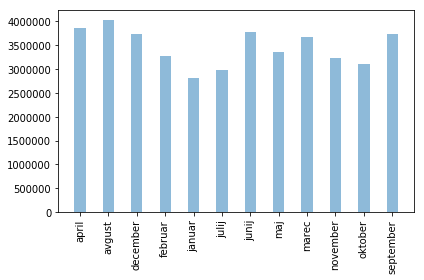

In [7]:
cash = []
months = []
for mesec, _ in alkohol_kolicina.items():
    cash.append(alkohol_denar[mesec])
    months.append(mesec)
pyplot1 = plt
pyplot1.figure()
xlen= range(len(months))
ylabel = cash
#plt.set_ylabel("Frekvenčna porazdelitev")
pyplot1.bar(meseci,ylabel,align="center", width=0.4, alpha=0.5)
pyplot1.xticks(rotation=90)
pyplot1.tight_layout()
#plt.set_title("Frekvenca žanrov")
pyplot1.show()